In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/credit_card_default.csv')

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_1                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [7]:
data.shape

(30000, 25)

In [8]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
#Splitting the data
x = data[['ID','PAY_6','BILL_AMT6','PAY_AMT6']]
y = data['LIMIT_BAL']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [12]:
#Choosing best k value
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
  knn_clf = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski',p=2)
  knn_clf.fit(x_train,y_train)
  y_pred_knn = knn_clf.predict(x_test)
  acc = accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)

In [13]:
metric_k

[0.118,
 0.12466666666666666,
 0.1245,
 0.128,
 0.129,
 0.13066666666666665,
 0.12916666666666668,
 0.13333333333333333,
 0.134,
 0.1365,
 0.13666666666666666,
 0.13333333333333333]

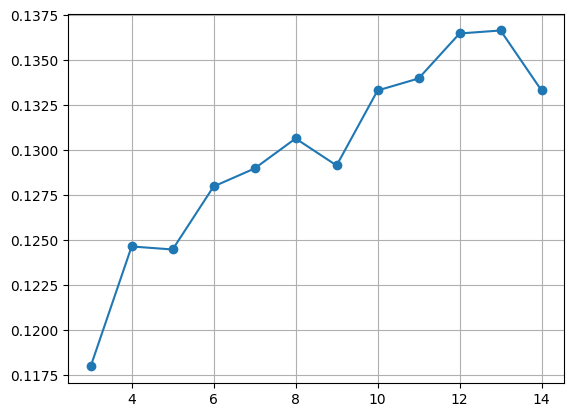

In [14]:
plt.plot(neighbors,metric_k,'o-')
plt.grid()

In [15]:
knn_clf = KNeighborsClassifier(n_neighbors = 13,metric = 'minkowski',p=2)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [16]:
y_pred_knn = knn_clf.predict(x_test)

In [17]:
accuracy_score(y_test, y_pred_knn)

0.13666666666666666

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [19]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier(n_estimators = 50,max_depth=3,random_state=42)

In [20]:
grad_clf.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [21]:
y_pred_grad = grad_clf.predict(x_test)

In [22]:
accuracy_score(y_test,y_pred_grad)

0.16383333333333333

In [23]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(n_estimators =150,random_state = 42)

In [24]:
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=150, random_state=42)

In [25]:
y_pred_ada = ada_clf.predict(x_test)

In [26]:
accuracy_score(y_test,y_pred_ada)

0.12483333333333334

In [30]:
#Hyperparameter Tuning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
accuracy_score(y_test,y_pred)

0.11016666666666666

In [32]:
#Featuring
from sklearn.model_selection import cross_val_score,KFold
model = LogisticRegression()
kf = KFold(n_splits = 5)

In [33]:
for train_index,test_index in kf.split(x,y):
  print('Training index : ', train_index)
  print('Test index : ', test_index)

Training index :  [ 6000  6001  6002 ... 29997 29998 29999]
Test index :  [   0    1    2 ... 5997 5998 5999]
Training index :  [    0     1     2 ... 29997 29998 29999]
Test index :  [ 6000  6001  6002 ... 11997 11998 11999]
Training index :  [    0     1     2 ... 29997 29998 29999]
Test index :  [12000 12001 12002 ... 17997 17998 17999]
Training index :  [    0     1     2 ... 29997 29998 29999]
Test index :  [18000 18001 18002 ... 23997 23998 23999]
Training index :  [    0     1     2 ... 23997 23998 23999]
Test index :  [24000 24001 24002 ... 29997 29998 29999]


In [34]:
score = cross_val_score(model,x,y,cv=kf) #cv-cross validation
print ('cross_val_score = ',score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

cross_val_score =  [0.06333333 0.12016667 0.138      0.1065     0.10616667]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print('Average cv ', score.mean())

Average cv  0.10683333333333334


In [36]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5)

In [37]:
for train_index,test_index in skfold.split(x,y):
  print('Training index : ', train_index)
  print('Test index : ', test_index)

Training index :  [  555  1347  1992 ... 29997 29998 29999]
Test index :  [    0     1     2 ... 14919 15407 23438]
Training index :  [    0     1     2 ... 29997 29998 29999]
Test index :  [  555  1347  1992 ... 19517 21375 24320]
Training index :  [    0     1     2 ... 29997 29998 29999]
Test index :  [ 4033  4251  4754 ... 23026 23096 28715]
Training index :  [    0     1     2 ... 29997 29998 29999]
Test index :  [ 7335  8282 10089 ... 26112 26227 29136]
Training index :  [    0     1     2 ... 26227 28715 29136]
Test index :  [13186 18006 21381 ... 29997 29998 29999]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [38]:
score1 = cross_val_score(model,x,y,cv=skfold)
print(score1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

[0.05683333 0.119      0.12666667 0.12183333 0.11383333]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
score1.mean()

0.10763333333333333

In [40]:
#Tuning
from sklearn import tree
max_depth = [1,2,3,4,5,6,7,8,9,10]
for val in max_depth:
  score = cross_val_score(tree.DecisionTreeClassifier(max_depth = val),x,y,cv = kf,scoring='accuracy')
  print('score = ',score.mean())

score =  0.12390000000000001
score =  0.13636666666666666
score =  0.1413
score =  0.14830000000000002
score =  0.15766666666666668
score =  0.1619
score =  0.1627
score =  0.16313333333333332
score =  0.16076666666666664
score =  0.1542333333333333


In [41]:
#SVM
from sklearn.svm import SVC

In [42]:
svc = SVC(kernel="linear")

In [ ]:
svc.fit(x_train,y_train)

In [ ]:
y_pred_svc = svc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_svc)

In [ ]:
#xgboost
import xgboost as xgb

In [ ]:
#Fitting XGBoost to the training data
my_model = xgb.XGBClassifier()
my_model.fit(x_train, y_train)

In [ ]:
y_pred = my_model.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)